In [1]:
from glob import glob

import numpy as np
import pandas as pd

import os

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger,LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers


In [11]:
train_dir = r"D:\NUS_TERM2_CA2\Train"
validation_dir = r"D:\NUS_TERM2_CA2\Validation"
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['food', 'landmark', 'people']
['food', 'landmark', 'people']


In [12]:
#define custom CNN model
def createModel():
  ipt = Input(shape=(224, 224, 3))
    
  x = ZeroPadding2D(padding=(1,1))(ipt)
  x = Conv2D(64, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(64, (3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(128, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(128, (3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(256, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(256, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(256, (3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = ZeroPadding2D(padding=(1,1))(x)
  x = Conv2D(512, (3,3), activation='relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1000, activation='relu')(x)
  x = Dense(3, activation='softmax')(x)
                
  
  model = Model(inputs=ipt, outputs=x)
  
  model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])
  
  return model

In [13]:
model = createModel()
model.summary()

W0923 20:31:43.791519  3248 deprecation.py:506] From c:\users\guofe\workspace\nus_is_pr\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

In [5]:
def lrSchedule(epoch):
    lr  = 1e-3
    
    if epoch > 160:
        lr  *= 0.5e-3
        
    elif epoch > 140:
        lr  *= 1e-3
        
    elif epoch > 120:
        lr  *= 1e-2
        
    elif epoch > 80:
        lr  *= 1e-1
        
    print('Learning rate: ', lr)
    
    return lr

LRScheduler     = LearningRateScheduler(lrSchedule)

modelname = 'CA2_Model'
filepath = modelname + '.hdf5'

checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=0,
                            save_best_only=True,
                            mode='max')

csv_logger = CSVLogger(modelname + '.csv')
callbacks_list  = [checkpoint,csv_logger,LRScheduler]

In [6]:
batch_size = 128
img_width, img_height = 224, 224

In [7]:
datagen = ImageDataGenerator(rescale=1./255,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rotation_range=90,
                             horizontal_flip=True,
                             vertical_flip=False)

train_generator = datagen.flow_from_directory(
  directory=train_dir ,
  target_size=(img_width, img_height),
  color_mode='rgb',
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=False)

Found 2424 images belonging to 3 classes.


In [8]:
datagen = ImageDataGenerator(rescale=1./255)
                             
validation_generator = datagen.flow_from_directory(
  directory=validation_dir ,
  target_size=(img_width, img_height),
  color_mode='rgb',
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=False)

Found 720 images belonging to 3 classes.


In [9]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    shuffle=True,
                    workers=8,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=callbacks_list)

NameError: name 'model' is not defined

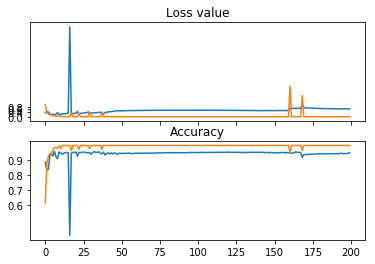

In [0]:
import pandas as pd

records     = pd.read_csv(modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'])
plt.plot(records['loss'])
plt.yticks([0.00,0.40,0.60,0.80])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])



plt.subplot(212)
plt.plot(records['val_acc'])
plt.plot(records['acc'])
plt.yticks([0.6,0.7,0.8,0.9])
plt.title('Accuracy',fontsize=12)
plt.show()